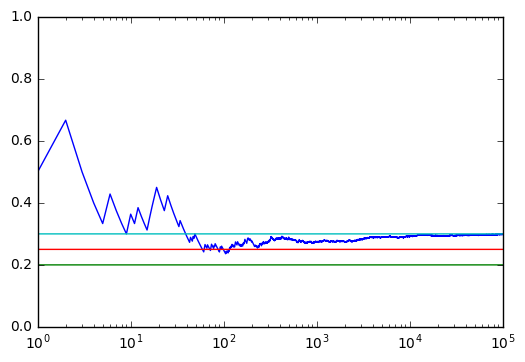

In [1]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import matplotlib.pyplot as plt
import numpy as np
from bayesian_bandit import Bandit


def run_experiment(p1, p2, p3, N):
  bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]

  data = np.empty(N)
  
  for i in range(N):
    # thompson sampling
    j = np.argmax([b.sample() for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average_ctr = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average_ctr)
  plt.plot(np.ones(N)*p1)
  plt.plot(np.ones(N)*p2)
  plt.plot(np.ones(N)*p3)
  plt.ylim((0,1))
  plt.xscale('log')
  plt.show()


run_experiment(0.2, 0.25, 0.3, 100000)